In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
data = pd.read_csv('\\Users\\Umesh\\Downloads\\univ\KDD\\Proj5\\dataset\\spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data = data.rename(columns = {'v1':'label','v2':'message'})

In [5]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
data['length'] = data['message'].apply(len)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C07251A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000016C06BBB7B8>], dtype=object)

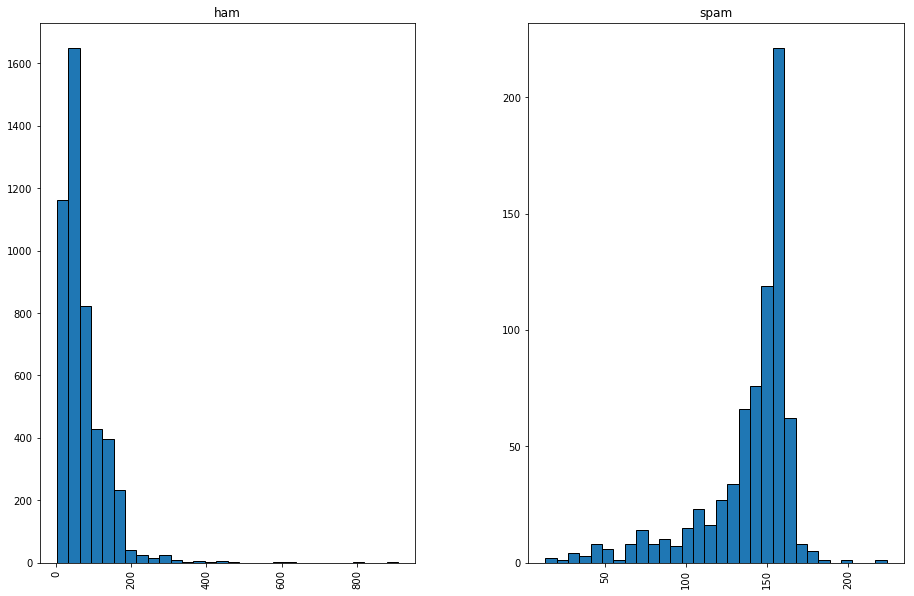

In [8]:
mpl.rcParams['patch.force_edgecolor'] = True
data.hist(column='length', by='label', bins=30,figsize=(15,10))

In [9]:
txt_feat = data['message'].copy()

In [10]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [11]:
text_process('Umesh is a good boy, except sometimes!')

'Umesh good boy except sometimes'

In [12]:
spam = data[data.label == 'spam']
ham = data[data.label == 'ham']
spam = spam['message'].copy()
ham = ham['message'].copy()

In [13]:
ham_words = ham.apply(text_process)
spam_words = spam.apply(text_process)

In [14]:
type(spam_words)

pandas.core.series.Series

In [15]:
from wordcloud import WordCloud

In [16]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words.to_string())
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words.to_string())

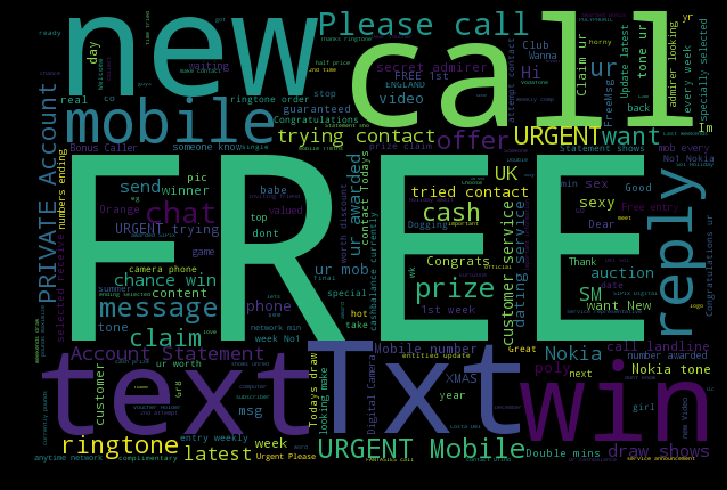

In [17]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

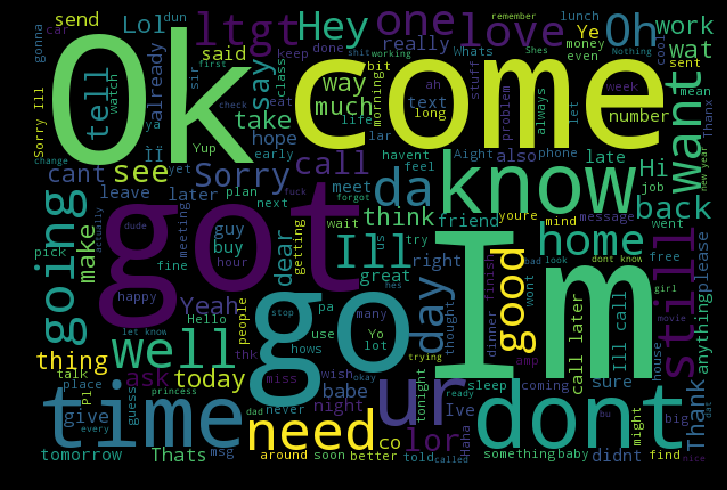

In [18]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [19]:
txt_feat = txt_feat.apply(text_process)

In [20]:
vectorizer = TfidfVectorizer("english")
feat = vectorizer.fit_transform(txt_feat)

In [21]:
features_train, features_test, labels_train, labels_test = train_test_split(feat, data['label'], test_size=0.25, random_state=10)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn import tree

import time

In [23]:
knc = KNeighborsClassifier(n_neighbors=40)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=10)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=33, random_state=10)

In [24]:
clfs = {'KNN' : knc, 'DTree': dtc, 'LogitReg': lrc, 'RandForest': rfc}

In [25]:
def train_classifier(key, clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)
    if key == 'DT':
        with open("tree.txt", "w") as f:
            f = tree.export_graphviz(clf, out_file=f)
def predict_labels(clf, features):
    return (clf.predict(features))

Time elapsed total: 0.12708640098571777
Using  KNN  Classifier:-
[[1200    1]
 [ 109   83]]


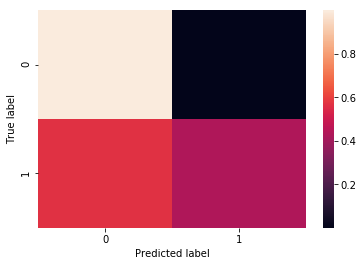

Time elapsed total: 0.2681725025177002
Using  DTree  Classifier:-
[[1167   34]
 [  29  163]]


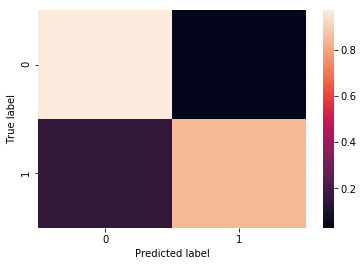

Time elapsed total: 0.01701188087463379
Using  LogitReg  Classifier:-
[[1190   11]
 [  67  125]]


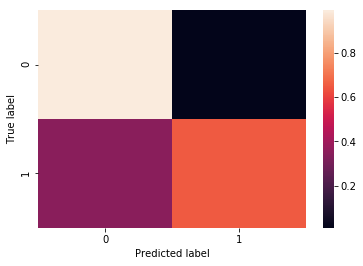

Time elapsed total: 1.7902722358703613
Using  RandForest  Classifier:-
[[1201    0]
 [  41  151]]


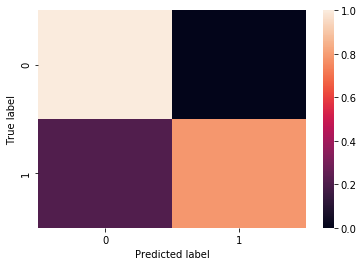

In [26]:
pred_scores = []
predict = [[0] for i in range(4)]
i = 0
for k,v in clfs.items():
    start_time = time.time()
    train_classifier(k, v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    print("Time elapsed total: "+str(time.time() - start_time))
    predict[i].append(pred)
    i = i + 1
    conf_mat = confusion_matrix(labels_test, pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_mat_normalized)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print('Using ', k, ' Classifier:-')
    print(conf_mat)
    plt.show()
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [27]:
scores = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
scores

,Score
KNN,0.921034
DTree,0.954774
LogitReg,0.944006
RandForest,0.970567


In [28]:
print('KNN', classification_report(labels_test, predict[0][1], target_names = ["Ham", "Spam"]))
print('DTree', classification_report(labels_test, predict[1][1], target_names = ["Ham", "Spam"]))
print('LogitReg', classification_report(labels_test, predict[2][1], target_names = ["Ham", "Spam"]))
print('RandForest', classification_report(labels_test, predict[3][1], target_names = ["Ham", "Spam"]))

KNN              precision    recall  f1-score   support

        Ham       0.92      1.00      0.96      1201
       Spam       0.99      0.43      0.60       192

avg / total       0.93      0.92      0.91      1393

DTree              precision    recall  f1-score   support

        Ham       0.98      0.97      0.97      1201
       Spam       0.83      0.85      0.84       192

avg / total       0.96      0.95      0.96      1393

LogitReg              precision    recall  f1-score   support

        Ham       0.95      0.99      0.97      1201
       Spam       0.92      0.65      0.76       192

avg / total       0.94      0.94      0.94      1393

RandForest              precision    recall  f1-score   support

        Ham       0.97      1.00      0.98      1201
       Spam       1.00      0.79      0.88       192

avg / total       0.97      0.97      0.97      1393



In [29]:
#features_test[labels_test < predict[0][1]]

In [30]:
##########################################################################################

In [31]:
lf = data['length'].as_matrix()
newfeat = np.hstack((feat.todense(),lf[:, None]))

In [32]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, data['label'], test_size=0.25, random_state=10)

Time elapsed total: 9.944084405899048
Using  KNN  Classifier:-
[[1147   54]
 [  86  106]]


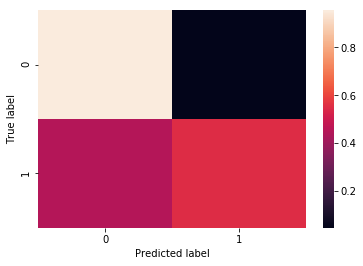

Time elapsed total: 17.996774435043335
Using  DTree  Classifier:-
[[1181   20]
 [  39  153]]


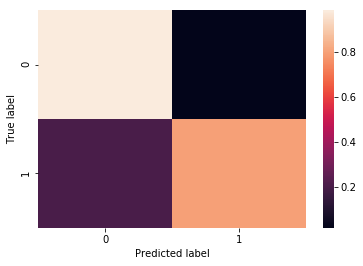

Time elapsed total: 0.1920163631439209
Using  LogitReg  Classifier:-
[[1188   13]
 [  58  134]]


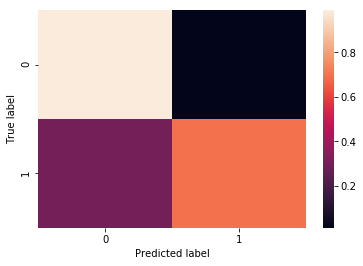

Time elapsed total: 12.562929153442383
Using  RandForest  Classifier:-
[[1201    0]
 [  37  155]]


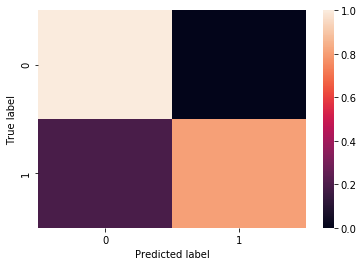

In [33]:
pred_scores = []
predict = [[0] for i in range(4)]
i = 0
for k,v in clfs.items():
    start_time = time.time()
    train_classifier(k, v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    print("Time elapsed total: "+str(time.time() - start_time))
    predict[i].append(pred)
    i = i + 1
    conf_mat = confusion_matrix(labels_test, pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_mat_normalized)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print('Using ', k, ' Classifier:-')
    print(conf_mat)
    plt.show()
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [34]:
print('KNN', classification_report(labels_test, predict[0][1], target_names = ["Ham", "Spam"]))
print('DTree', classification_report(labels_test, predict[1][1], target_names = ["Ham", "Spam"]))
print('LogitReg', classification_report(labels_test, predict[2][1], target_names = ["Ham", "Spam"]))
print('RandForest', classification_report(labels_test, predict[3][1], target_names = ["Ham", "Spam"]))

KNN              precision    recall  f1-score   support

        Ham       0.93      0.96      0.94      1201
       Spam       0.66      0.55      0.60       192

avg / total       0.89      0.90      0.90      1393

DTree              precision    recall  f1-score   support

        Ham       0.97      0.98      0.98      1201
       Spam       0.88      0.80      0.84       192

avg / total       0.96      0.96      0.96      1393

LogitReg              precision    recall  f1-score   support

        Ham       0.95      0.99      0.97      1201
       Spam       0.91      0.70      0.79       192

avg / total       0.95      0.95      0.95      1393

RandForest              precision    recall  f1-score   support

        Ham       0.97      1.00      0.98      1201
       Spam       1.00      0.81      0.89       192

avg / total       0.97      0.97      0.97      1393



In [35]:
df3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
scores = pd.concat([scores,df3],axis=1)
scores

,Score,Score2
KNN,0.921034,0.899497
DTree,0.954774,0.957645
LogitReg,0.944006,0.949031
RandForest,0.970567,0.973439


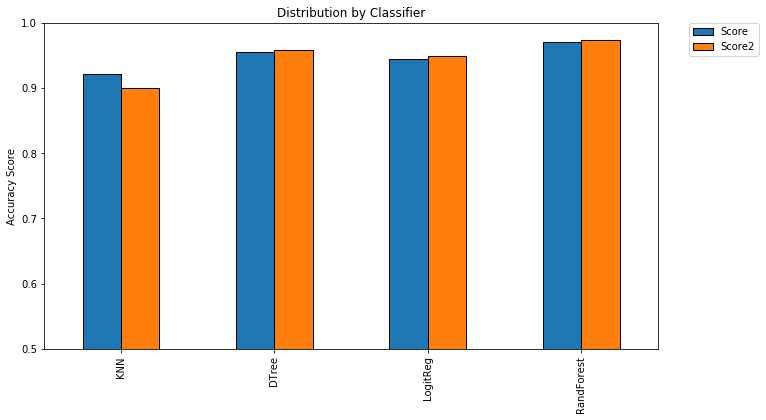

In [99]:
scores.plot(kind='bar', ylim=(0.5,1.0), figsize=(11,6), align='center')
plt.xticks(np.arange(4), scores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [36]:
###############################################################################################

In [37]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [38]:
################################################################################################

In [39]:
data['type'] = None

In [40]:
data.head()

,label,message,length,type
0,ham,"Go until jurong point, crazy.. Available only ...",111,None
1,ham,Ok lar... Joking wif u oni...,29,None
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,None
3,ham,U dun say so early hor... U c already then say...,49,None
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,None


In [41]:
data['message'] = data['message'].map(lambda x: x.lower())

In [42]:
data.head()

,label,message,length,type
0,ham,"go until jurong point, crazy.. available only ...",111,None
1,ham,ok lar... joking wif u oni...,29,None
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,None
3,ham,u dun say so early hor... u c already then say...,49,None
4,ham,"nah i don't think he goes to usf, he lives aro...",61,None


In [43]:
data.loc[(data['message'].str.contains("free")) & (data['label'] == 'spam'), 'type'] = 'free'

In [44]:
data.head()

,label,message,length,type
0,ham,"go until jurong point, crazy.. available only ...",111,None
1,ham,ok lar... joking wif u oni...,29,None
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,free
3,ham,u dun say so early hor... u c already then say...,49,None
4,ham,"nah i don't think he goes to usf, he lives aro...",61,None


In [45]:
data.loc[(data['message'].str.contains("winner")) & (data['label'] == 'spam'), 'type'] = 'lottery'
data.loc[(data['message'].str.contains("win")) & (data['label'] == 'spam'), 'type'] = 'lottery'
data.loc[(data['message'].str.contains("won")) & (data['label'] == 'spam'), 'type'] = 'lottery'
data.loc[(data['message'].str.contains("awarded")) & (data['label'] == 'spam'), 'type'] = 'lottery'
data.loc[(data['message'].str.contains("selected")) & (data['label'] == 'spam'), 'type'] = 'lottery'
data.loc[(data['message'].str.contains("congrats")) & (data['label'] == 'spam'), 'type'] = 'lottery'
data.loc[(data['message'].str.contains("congratulation")) & (data['label'] == 'spam'), 'type'] = 'lottery'
data.loc[(data['message'].str.contains("reward")) & (data['label'] == 'spam'), 'type'] = 'lottery'
data.loc[(data['message'].str.contains("prize")) & (data['label'] == 'spam'), 'type'] = 'lottery'

In [46]:
data.loc[data['type'] == 'lottery'].head()

,label,message,length,type
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,lottery
8,spam,winner!! as a valued network customer you have...,158,lottery
11,spam,"six chances to win cash! from 100 to 20,000 po...",136,lottery
12,spam,urgent! you have won a 1 week free membership ...,156,lottery
54,spam,sms. ac sptv: the new jersey devils and the de...,120,lottery


In [47]:
data.loc[(data['message'].str.contains("xxx")) & (data['label'] == 'spam'), 'type'] = 'adult'
data.loc[(data['message'].str.contains("babe")) & (data['label'] == 'spam'), 'type'] = 'adult'
data.loc[(data['message'].str.contains("nude")) & (data['label'] == 'spam'), 'type'] = 'adult'
data.loc[(data['message'].str.contains("naked")) & (data['label'] == 'spam'), 'type'] = 'adult'
data.loc[(data['message'].str.contains("dirty")) & (data['label'] == 'spam'), 'type'] = 'adult'
data.loc[(data['message'].str.contains("sex")) & (data['label'] == 'spam'), 'type'] = 'adult'
data.loc[(data['message'].str.contains("laid")) & (data['label'] == 'spam'), 'type'] = 'adult'

In [48]:
data.loc[(data['message'].str.contains("urgent")) & (data['label'] == 'spam'), 'type'] = 'attention'
data.loc[(data['message'].str.contains("attention")) & (data['label'] == 'spam'), 'type'] = 'attention'
data.loc[(data['message'].str.contains("bonus")) & (data['label'] == 'spam'), 'type'] = 'attention'
data.loc[(data['message'].str.contains("immediate")) & (data['label'] == 'spam'), 'type'] = 'attention'

In [49]:
data.loc[(data['message'].str.contains("ringtone")) & (data['label'] == 'spam'), 'type'] = 'carrier'
data.loc[(data['message'].str.contains("sms")) & (data['label'] == 'spam'), 'type'] = 'carrier'

In [50]:
data.loc[(data['type'].isnull()) & (data['label'] == 'spam'), 'type'] = 'other'

In [51]:
data.loc[(data['type'].isnull()) & (data['label'] == 'spam')]

,label,message,length,type


In [52]:
spamdata = data.loc[data['label'] == 'spam']
spamdata.head()

,label,message,length,type
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,lottery
5,spam,freemsg hey there darling it's been 3 week's n...,148,adult
8,spam,winner!! as a valued network customer you have...,158,lottery
9,spam,had your mobile 11 months or more? u r entitle...,154,free
11,spam,"six chances to win cash! from 100 to 20,000 po...",136,lottery


In [53]:
data.type.value_counts()

other        240
lottery      175
free         121
carrier       82
attention     72
adult         57
Name: type, dtype: int64

In [54]:
knc = KNeighborsClassifier(n_neighbors=40)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=10)
lrc = LogisticRegression(solver='newton-cg', penalty='l2')
rfc = RandomForestClassifier(n_estimators=33, random_state=10)

In [55]:
txt_feat = spamdata['message'].copy()
txt_feat = txt_feat.apply(text_process)
vectorizer = TfidfVectorizer("english")
feat = vectorizer.fit_transform(txt_feat)
features_train, features_test, labels_train, labels_test = train_test_split(feat, spamdata['type'], test_size=0.25, random_state=10)

Time elapsed total: 0.036026716232299805
Using  KNN  Classifier:-
[[ 4  0  1  4  0  8]
 [ 0 11  0  0  2  0]
 [ 0  1  3  8  0  8]
 [ 0  0  0 25  3  2]
 [ 0  2  0  6 31  5]
 [ 1  5  2  6 12 37]]


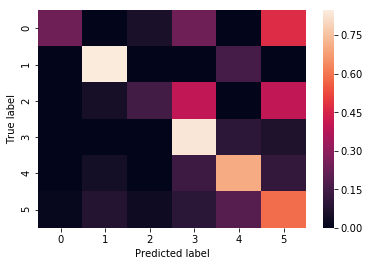

Time elapsed total: 0.04002523422241211
Using  DTree  Classifier:-
[[11  0  0  0  0  6]
 [ 0 13  0  0  0  0]
 [ 2  0 14  2  1  1]
 [ 0  0  2 28  0  0]
 [ 1  0  0  1 38  4]
 [ 2  0  4  0  4 53]]


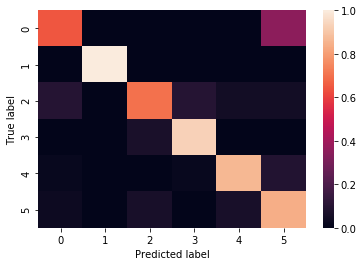

Time elapsed total: 0.013008594512939453
Using  LogitReg  Classifier:-
[[ 4  0  0  0  0 13]
 [ 0 10  0  0  1  2]
 [ 0  0  8  3  0  9]
 [ 0  0  0 27  1  2]
 [ 0  0  0  2 33  9]
 [ 0  0  0  0  0 63]]


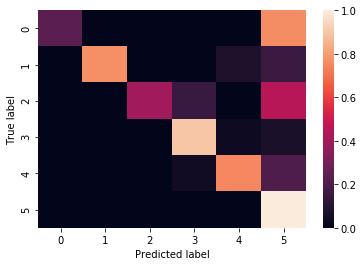

Time elapsed total: 0.1871492862701416
Using  RandForest  Classifier:-
[[10  0  0  0  0  7]
 [ 0 13  0  0  0  0]
 [ 0  0 14  2  0  4]
 [ 0  0  0 30  0  0]
 [ 0  1  1  0 38  4]
 [ 2  0  1  0  0 60]]


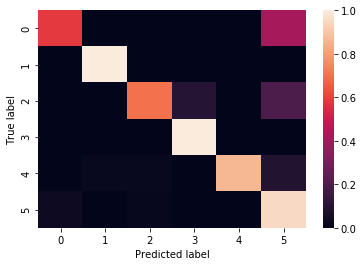

,Score
KNN,0.593583
DTree,0.839572
LogitReg,0.775401
RandForest,0.882353


In [56]:
pred_scores = []
predict = [[0] for i in range(4)]
i = 0
for k,v in clfs.items():
    start_time = time.time()
    train_classifier(k, v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    print("Time elapsed total: "+str(time.time() - start_time))
    predict[i].append(pred)
    i = i + 1
    conf_mat = confusion_matrix(labels_test, pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_mat_normalized)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print('Using ', k, ' Classifier:-')
    print(conf_mat)
    plt.show()
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

scores_type = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
scores_type

In [57]:
print('KNN', classification_report(labels_test, predict[0][1], target_names = ["other", "lottery", "adult", "attention", "carrier", "free"]))
print('DTree', classification_report(labels_test, predict[1][1], target_names = ["other", "lottery", "adult", "attention", "carrier", "free"]))
print('LogitReg', classification_report(labels_test, predict[2][1], target_names = ["other", "lottery", "adult", "attention", "carrier", "free"]))
print('RandForest', classification_report(labels_test, predict[3][1], target_names = ["other", "lottery", "adult", "attention", "carrier", "free"]))

KNN              precision    recall  f1-score   support

      other       0.80      0.24      0.36        17
    lottery       0.58      0.85      0.69        13
      adult       0.50      0.15      0.23        20
  attention       0.51      0.83      0.63        30
    carrier       0.65      0.70      0.67        44
       free       0.62      0.59      0.60        63

avg / total       0.61      0.59      0.57       187

DTree              precision    recall  f1-score   support

      other       0.69      0.65      0.67        17
    lottery       1.00      1.00      1.00        13
      adult       0.70      0.70      0.70        20
  attention       0.90      0.93      0.92        30
    carrier       0.88      0.86      0.87        44
       free       0.83      0.84      0.83        63

avg / total       0.84      0.84      0.84       187

LogitReg              precision    recall  f1-score   support

      other       1.00      0.24      0.38        17
    lottery       1.

In [58]:
lf = spamdata['length'].as_matrix()
newfeat = np.hstack((feat.todense(),lf[:, None]))
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, spamdata['type'], test_size=0.25, random_state=10)

Time elapsed total: 0.17512726783752441
Using  KNN  Classifier:-
[[ 0  0  0  2  4 11]
 [ 0  1  0  0  3  9]
 [ 0  0  1  2  6 11]
 [ 0  0  0 11 12  7]
 [ 0  1  0  2 19 22]
 [ 0  0  0  3  7 53]]


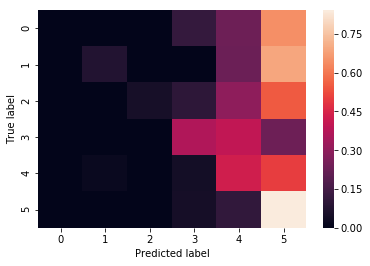

Time elapsed total: 0.11708211898803711
Using  DTree  Classifier:-
[[13  0  0  0  0  4]
 [ 0 13  0  0  0  0]
 [ 0  0 14  2  1  3]
 [ 0  0  2 24  4  0]
 [ 2  0  0  1 37  4]
 [ 5  0  3  2  1 52]]


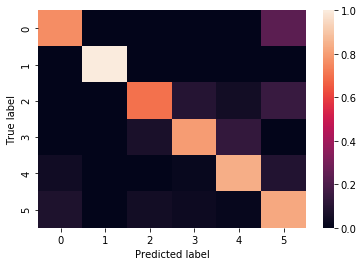

Time elapsed total: 0.12132453918457031
Using  LogitReg  Classifier:-
[[ 2  0  0  0  0 15]
 [ 0 10  0  0  1  2]
 [ 0  0  8  3  0  9]
 [ 0  0  0 27  1  2]
 [ 0  0  0  2 33  9]
 [ 0  0  0  0  0 63]]


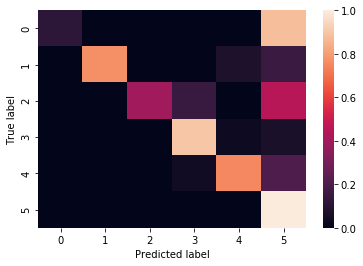

Time elapsed total: 0.16211700439453125
Using  RandForest  Classifier:-
[[11  0  0  0  0  6]
 [ 0 13  0  0  0  0]
 [ 0  0 14  1  0  5]
 [ 0  0  0 28  1  1]
 [ 0  0  0  0 39  5]
 [ 2  0  0  0  0 61]]


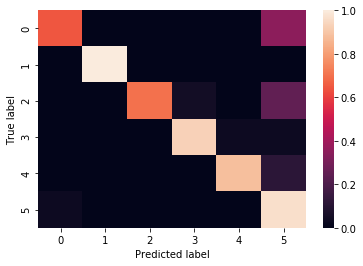

,Score,Score2
KNN,0.593583,0.454545
DTree,0.839572,0.818182
LogitReg,0.775401,0.764706
RandForest,0.882353,0.887701


In [59]:
pred_scores = []
predict = [[0] for i in range(4)]
i = 0
for k,v in clfs.items():
    start_time = time.time()
    train_classifier(k, v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    print("Time elapsed total: "+str(time.time() - start_time))
    predict[i].append(pred)
    i = i + 1
    conf_mat = confusion_matrix(labels_test, pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_mat_normalized)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print('Using ', k, ' Classifier:-')
    print(conf_mat)
    plt.show()
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

df3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
scores_type = pd.concat([scores_type,df3],axis=1)
scores_type

In [97]:
scores_type

,Score,Score2
KNN,0.593583,0.454545
DTree,0.839572,0.818182
LogitReg,0.775401,0.764706
RandForest,0.882353,0.887701


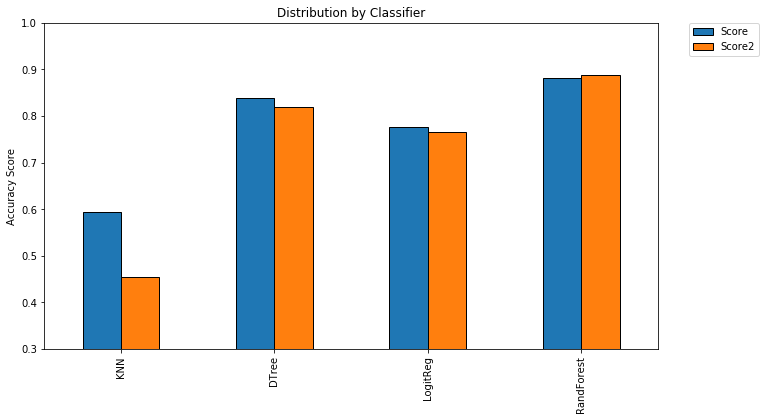

In [98]:
scores_type.plot(kind='bar', ylim=(0.3,1.0), figsize=(11,6), align='center')
plt.xticks(np.arange(4), scores_type.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [60]:
print('KNN', classification_report(labels_test, predict[0][1], target_names = ["other", "lottery", "adult", "attention", "carrier", "free"]))
print('DTree', classification_report(labels_test, predict[1][1], target_names = ["other", "lottery", "adult", "attention", "carrier", "free"]))
print('LogitReg', classification_report(labels_test, predict[2][1], target_names = ["other", "lottery", "adult", "attention", "carrier", "free"]))
print('RandForest', classification_report(labels_test, predict[3][1], target_names = ["other", "lottery", "adult", "attention", "carrier", "free"]))

KNN              precision    recall  f1-score   support

      other       0.00      0.00      0.00        17
    lottery       0.50      0.08      0.13        13
      adult       1.00      0.05      0.10        20
  attention       0.55      0.37      0.44        30
    carrier       0.37      0.43      0.40        44
       free       0.47      0.84      0.60        63

avg / total       0.48      0.45      0.39       187

DTree              precision    recall  f1-score   support

      other       0.65      0.76      0.70        17
    lottery       1.00      1.00      1.00        13
      adult       0.74      0.70      0.72        20
  attention       0.83      0.80      0.81        30
    carrier       0.86      0.84      0.85        44
       free       0.83      0.83      0.83        63

avg / total       0.82      0.82      0.82       187

LogitReg              precision    recall  f1-score   support

      other       1.00      0.12      0.21        17
    lottery       1.

C:\Users\Umesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
################################################################################################################################

In [62]:
txt_feat = data['message'].copy()
txt_feat = txt_feat.apply(text_process)
vectorizer = TfidfVectorizer("english")
feat = vectorizer.fit_transform(txt_feat)
features_train, features_test, labels_train, labels_test = train_test_split(feat, data['label'], test_size=0.25, random_state=10)


In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [64]:
list_feat = txt_feat.tolist()

In [65]:
list_feat

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say early hor u c already say',
 'nah dont think goes usf lives around though',
 'freemsg hey darling 3 weeks word back id like fun still tb ok xxx std chgs send å£150 rcv',
 'even brother like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune',
 'winner valued network customer selected receivea å£900 prize reward claim call 09061701461 claim code kl341 valid 12 hours',
 'mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030',
 'im gonna home soon dont want talk stuff anymore tonight k ive cried enough today',
 'six chances win cash 100 20000 pounds txt csh11 send 87575 cost 15

In [66]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(list_feat)

true_k = 2
start_time = time.time()
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print("Time elapsed total: "+str(time.time() - start_time))


Time elapsed total: 1.5201022624969482


In [67]:
len(model.labels_)

5572

In [68]:
data.head()

,label,message,length,type
0,ham,"go until jurong point, crazy.. available only ...",111,None
1,ham,ok lar... joking wif u oni...,29,None
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,lottery
3,ham,u dun say so early hor... u c already then say...,49,None
4,ham,"nah i don't think he goes to usf, he lives aro...",61,None


In [69]:
data2 = data

In [70]:
data2['pred_labels'] = model.labels_

In [71]:
data2[(data2['pred_labels'] == 0) & (data2['label'] == 'ham')].head()

,label,message,length,type,pred_labels
0,ham,"go until jurong point, crazy.. available only ...",111,None,0
3,ham,u dun say so early hor... u c already then say...,49,None,0
4,ham,"nah i don't think he goes to usf, he lives aro...",61,None,0
6,ham,even my brother is not like to speak with me. ...,77,None,0
7,ham,as per your request 'melle melle (oru minnamin...,160,None,0


In [72]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import plotly.plotly as py

In [73]:
X = X.todense()

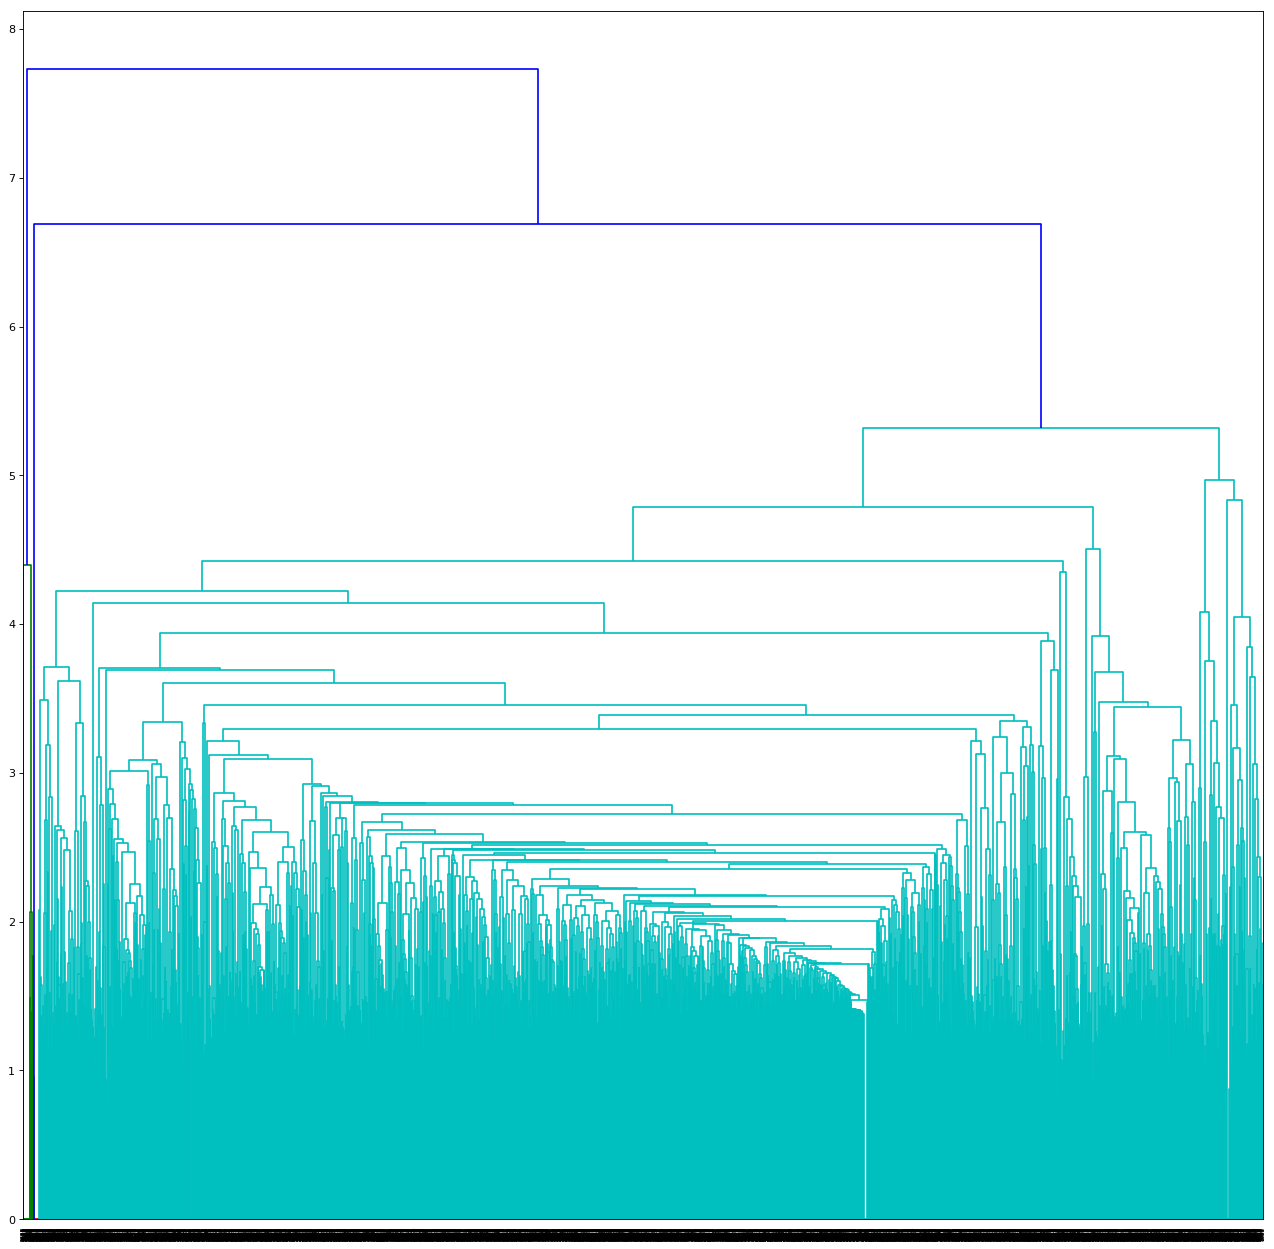

In [74]:
Z = linkage(X, 'ward')
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
dn = dendrogram(Z)
plt.show()

In [75]:
##################################################################################################

In [76]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [77]:
X = vectorizer.fit_transform(txt_feat.as_matrix()).toarray()
start_time = time.time()
db = DBSCAN(eps=0.8, min_samples=20).fit(X)
print("Time elapsed total: "+str(time.time() - start_time))

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data['label'], labels))
print("Completeness: %0.3f" % metrics.completeness_score(data['label'], labels))
print("V-measure: %0.3f" % metrics.v_measure_score(data['label'], labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(data['label'], labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(data['label'], labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
#import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
#unique_labels = set(labels)
#colors = [plt.cm.Spectral(each)
#          for each in np.linspace(0, 1, len(unique_labels))]
#for k, col in zip(unique_labels, colors):
#    if k == -1:
#        # Black used for noise.
#        col = [0, 0, 0, 1]
#
#    class_member_mask = (labels == k)
#
#    xy = X[class_member_mask & core_samples_mask]
#    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#             markeredgecolor='k', markersize=14)

#    xy = X[class_member_mask & ~core_samples_mask]
#    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#             markeredgecolor='k', markersize=6)

#plt.title('Estimated number of clusters: %d' % n_clusters_)
#plt.show()

Time elapsed total: 207.58738255500793
Estimated number of clusters: 2
Homogeneity: 0.004
Completeness: 0.024
V-measure: 0.007
Adjusted Rand Index: -0.018
Adjusted Mutual Information: 0.004
Silhouette Coefficient: -0.000


In [78]:
np.unique(db.labels_)

array([-1,  0,  1], dtype=int64)

In [79]:
from sklearn.decomposition import PCA

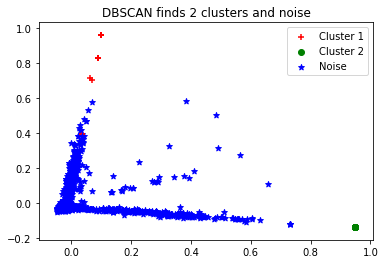

In [80]:
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)
c1,c2,c3 = 0,0,0
for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

In [81]:
data3 = data

In [82]:
data3['pred_labels'] = db.labels_

In [83]:
data3[(data3['pred_labels'] == 0) & (data3['label'] == 'ham')]

,label,message,length,type,pred_labels
57,ham,"sorry, i'll call later in meeting.",34,None,0
80,ham,"sorry, i'll call later",22,None,0
222,ham,"sorry, i'll call later",22,None,0
338,ham,"sorry, i'll call later",22,None,0
443,ham,"sorry, i'll call later",22,None,0
589,ham,"i'm in a meeting, call me later at",34,None,0
701,ham,"sorry, i'll call later",22,None,0
767,ham,"sorry, i'll call later",22,None,0
1131,ham,"sorry, i'll call later",22,None,0
1151,ham,"sorry, i'll call later",22,None,0


In [84]:
data3[(data3['pred_labels'] == 1) & (data3['label'] == 'ham')]

,label,message,length,type,pred_labels
286,ham,ok..,4,None,1
1272,ham,ok...,5,None,1
1318,ham,ok...,5,None,1
1426,ham,ok...,5,None,1
1482,ham,ok...,5,None,1
1699,ham,ok...,5,None,1
1924,ham,ok,2,None,1
2181,ham,ok.,3,None,1
2321,ham,ok...,5,None,1
2508,ham,ok...,5,None,1


In [85]:
outdata = data3[(data3['pred_labels'] == -1)].message
outdata.head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [86]:
X = vectorizer.fit_transform(outdata.as_matrix()).toarray()
start_time = time.time()
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
print("Time elapsed total: "+str(time.time() - start_time))

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data3[(data3['pred_labels'] == -1)].label, labels))
print("Completeness: %0.3f" % metrics.completeness_score(data3[(data3['pred_labels'] == -1)].label, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(data3[(data3['pred_labels'] == -1)].label, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(data3[(data3['pred_labels'] == -1)].label, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(data3[(data3['pred_labels'] == -1)].label, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Time elapsed total: 47.654794216156006
Estimated number of clusters: 2
Homogeneity: 0.002
Completeness: 0.022
V-measure: 0.004
Adjusted Rand Index: -0.010
Adjusted Mutual Information: 0.002
Silhouette Coefficient: -0.283


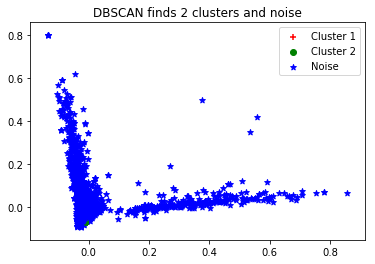

In [87]:
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)
c1,c2,c3 = 0,0,0
for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

In [88]:
data4 = data3[(data3['pred_labels'] == -1)]
data4 = data4.drop('pred_labels', axis = 1)

In [89]:
data4['pred_labels'] = db.labels_

In [90]:
data4[(data4['pred_labels'] == 0) & (data4['label'] == 'ham')]

,label,message,length,type,pred_labels
74,ham,u can call me now...,20,None,0
959,ham,where @,7,None,0
1087,ham,you can never do nothing,24,None,0
1190,ham,we're done...,13,None,0
1552,ham,u too...,8,None,0
2096,ham,i'm done...,11,None,0
2740,ham,nothing. can...,15,None,0
2805,ham,can a not?,10,None,0
2871,ham,see you there!,15,None,0
2927,ham,anything...,11,None,0


In [91]:
data4[(data4['pred_labels'] == 1) & (data4['label'] == 'ham')]

,label,message,length,type,pred_labels
298,ham,i cant pick the phone right now. pls send a me...,51,None,1
768,ham,i cant pick the phone right now. pls send a me...,51,None,1
1303,ham,i cant pick the phone right now. pls send a me...,51,None,1
1737,ham,i cant pick the phone right now. pls send a me...,51,None,1
1948,ham,i cant pick the phone right now. pls send a me...,51,None,1
2265,ham,i cant pick the phone right now. pls send a me...,51,None,1
2617,ham,i cant pick the phone right now. pls send a me...,51,None,1
3679,ham,i cant pick the phone right now. pls send a me...,51,None,1
4038,ham,i cant pick the phone right now. pls send a me...,51,None,1
4658,ham,i cant pick the phone right now. pls send a me...,51,None,1


In [92]:
data4[(data4['pred_labels'] == -1) & (data4['label'] == 'spam')]

,label,message,length,type,pred_labels
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,lottery,-1
5,spam,freemsg hey there darling it's been 3 week's n...,148,adult,-1
8,spam,winner!! as a valued network customer you have...,158,lottery,-1
9,spam,had your mobile 11 months or more? u r entitle...,154,free,-1
11,spam,"six chances to win cash! from 100 to 20,000 po...",136,lottery,-1
12,spam,urgent! you have won a 1 week free membership ...,156,attention,-1
15,spam,"xxxmobilemovieclub: to use your credit, click ...",149,adult,-1
19,spam,england v macedonia - dont miss the goals/team...,156,other,-1
34,spam,thanks for your subscription to ringtone uk yo...,159,carrier,-1
42,spam,07732584351 - rodger burns - msg = we tried to...,172,carrier,-1
